### Machine Learning Models for Predicting Mobile Phone Prices

This is Classification Data set in which we have to classify the price range of mobiles.

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [ ]:
Mobile_data = pd.read_csv("Mobile_DS.csv")
Mobile_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,1
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,2
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,2
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,2
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,Yes,0.5,Yes,0,Yes,2,0.8,106,6,...,1222,1890,668,13,4,19,Yes,Yes,No,0
1996,1965,Yes,2.6,Yes,0,No,39,0.2,187,4,...,915,1965,2032,11,10,16,Yes,Yes,Yes,2
1997,1911,No,0.9,Yes,1,Yes,36,0.7,108,8,...,868,1632,3057,9,1,5,Yes,Yes,No,3
1998,1512,No,0.9,No,4,Yes,46,0.1,145,5,...,336,670,869,18,10,19,Yes,Yes,Yes,0


Features Explanation:

battery_power: Total energy a battery can store in one time measured in mAh.

blue: Has bluetooth or not.

clock_speed: speed at which microprocessor executes instructions.

dual_sim: Has dual sim suppfour_gort or not.

fc: Front Camera mega pixels.

four_g: Has 4G or not.

int_memory: Internal Memory in Gigabytes.

m_dep: Mobile Depth in cm.

mobile_wt: Weight of mobile phone.

n_cores: Number of cores of processor.

pc: Primary Camera mega pixels.

px_height: Pixel Resolution Height.

px_width: Pixel Resolution Width.

ram: Random Access Memory in Gigabytes.

sc_h: Screen Height of mobile in cm.

sc_w: Screen Width of mobile in cm.

talk_time: longest time that a single battery charge will last when you are.

three_g: Has 3G or not.

touch_screen: Has touch screen or not.

wifi: Has wifi or not.

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Regression


###Linear Regression

I took clock speed and ram as features for linear regression model.

In [ ]:
df_Lin_reg = Mobile_data[['clock_speed','ram']]
# checking null values
print(df_Lin_reg.isna().sum())
df_Lin_reg.tail()

clock_speed    0
ram            0
dtype: int64


,clock_speed,ram
1995,0.5,668
1996,2.6,2032
1997,0.9,3057
1998,0.9,869
1999,2.0,3919


In [ ]:
X = df_Lin_reg.iloc[:, :-1].values
y = df_Lin_reg.iloc[:,1].values

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 1)
Shape of y_train: (1600,)
Shape of X_test: (400, 1)
Shape of y_test: (400,)


In [ ]:
# Fit Simple Linear Regression to Training Data

model = LinearRegression(fit_intercept= True)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fetching intercept (b0) and coefficient (b1)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 2.1436564217130916
Coefficients: [-0.01890025]


In [ ]:
# Make Prediction for testing data
y_pred = model.predict(X_test)

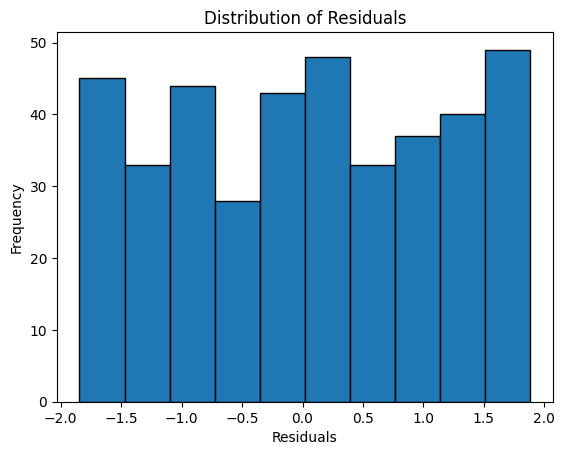

In [ ]:
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

The distrubution is not looking like normal.

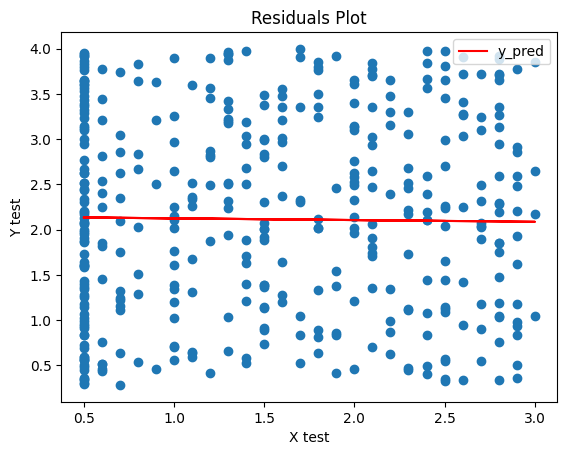

In [ ]:
#residual plots for prediction-residual means difference between y_test and y_pred
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color="r",label="y_pred")
plt.xlabel("X test")
plt.ylabel("Y test")
plt.legend(loc="upper right")
plt.title("Residuals Plot")
plt.show()

The variables that have taken are not colinear to each other. Thats why the graph looks like.

##KNN Regression

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=2,metric="euclidean")
KNN.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=2)

In [ ]:
# Make Prediction for testing data
y_pred_knn = KNN.predict(X_test)

## Random Forest Regressor

In [ ]:
Ran_regr = RandomForestRegressor(max_depth=2, random_state=0)
Ran_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
# Make Prediction for testing data
y_pred_ran = Ran_regr.predict(X_test)

## Decision Tree Regressor

In [ ]:
# Fit the decision tree model
DT_Reg = DecisionTreeRegressor(max_depth=1)
DT_Reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
# Make Prediction for testing data
y_pred_DT = DT_Reg.predict(X_test)

##Comparison

In [ ]:
#LINEAR REGRESION PERFORMANCE MEASURE
print('Mean Absolute Error of Linear Regression:', mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error of Linear Regression:', mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error of Linear Regression:', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error of Linear Regression:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error of Linear Regression: 0.9415407137510868
Mean Absolute Percentage Error of Linear Regression: 0.8037959894073922
Mean Squared Error of Linear Regression: 1.204314393536986
Root Mean Squared Error of Linear Regression: 1.0974125903856697


In [ ]:
#KNN REGRESION PERFORMANCE MEASURE
print('Mean Absolute Error of KNN Regression:', mean_absolute_error(y_test,y_pred_knn))
print('Mean Absolute Percentage Error of KNN Regression:', mean_absolute_percentage_error(y_test,y_pred_knn))
print('Mean Squared Error of KNN Regression:', mean_squared_error(y_test,y_pred_knn))
print('Root Mean Squared Error of KNN Regression:',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Mean Absolute Error of KNN Regression: 1.0779075
Mean Absolute Percentage Error of KNN Regression: 0.8349060747962374
Mean Squared Error of KNN Regression: 1.6520907175
Root Mean Squared Error of KNN Regression: 1.2853368109176675


In [ ]:
#Random Forest REGRESION PERFORMANCE MEASURE
print('Mean Absolute Error of Random Forest Regression:', mean_absolute_error(y_test,y_pred_ran))
print('Mean Absolute Percentage Error of Random Forest Regression:', mean_absolute_percentage_error(y_test,y_pred_ran))
print('Mean Squared Error of Random Forest Regression:', mean_squared_error(y_test,y_pred_ran))
print('Root Mean Squared Error of Random Forest Regression:',np.sqrt(mean_squared_error(y_test,y_pred_ran)))

Mean Absolute Error of Random Forest Regression: 0.9396269648942537
Mean Absolute Percentage Error of Random Forest Regression: 0.7972199862694934
Mean Squared Error of Random Forest Regression: 1.1990670541163593
Root Mean Squared Error of Random Forest Regression: 1.0950192026244834


In [ ]:
#Decision Tree REGRESION PERFORMANCE MEASURE
print('Mean Absolute Error of Decison Tree Regression:', mean_absolute_error(y_test,y_pred_DT))
print('Mean Absolute Percentage Error of Decison Tree Regression:', mean_absolute_percentage_error(y_test,y_pred_DT))
print('Mean Squared Error of Decison Tree Regression:', mean_squared_error(y_test,y_pred_DT))
print('Root Mean Squared Error of Decison Tree Regression:',np.sqrt(mean_squared_error(y_test,y_pred_DT)))

Mean Absolute Error of Decison Tree Regression: 0.9430426414160025
Mean Absolute Percentage Error of Decison Tree Regression: 0.8012440702067899
Mean Squared Error of Decison Tree Regression: 1.2066869160107396
Root Mean Squared Error of Decison Tree Regression: 1.0984930204651915


## Building Multiple Regression models and with hyperparameter tuning.

In [ ]:
# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),  # Apply feature scaling
    ('model', LinearRegression())  # Initial model
]

# Define the parameter grid for each model
param_grid = [
    # Linear Regression
    {
        'model': [LinearRegression()]
    },
    # KNN Regression
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7]  # Example hyperparameter values
    },
    # Decision Tree Regression
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [None, 5, 10]  # Example hyperparameter values
    },
    # SVM Regression
    {
        'model': [SVR()],
        'model__C': [1.0, 10.0, 100.0],  # Example hyperparameter values
        'model__kernel': ['linear', 'rbf']  # Example hyperparameter values
    },
    # Random Forest Regression
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200],  # Example hyperparameter values
        'model__max_depth': [None, 5]  # Example hyperparameter values
    }
]

# Create the pipeline
pipeline = Pipeline(steps)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)  # 5-fold cross-validation

# Fit the pipeline to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best result of each model
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"Model {i+1} - Hyperparameters: {params}")
    print(f"Model {i+1} - MSE: {-grid_search.cv_results_['mean_test_score'][i]}")
    print(f"Model {i+1} - RMSE: {np.sqrt(-grid_search.cv_results_['mean_test_score'][i])}")
    print(f"Model {i+1} - MAE: {-grid_search.cv_results_['mean_test_score'][i]}")

    if i == grid_search.best_index_:
        # Transform test set using the best scaler
        X_test_scaled = grid_search.best_estimator_.named_steps['scaler'].transform(X_test)

        # Predict on test set using the best model
        y_pred = grid_search.best_estimator_.predict(X_test_scaled)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print(f"Model {i+1} - Best MAPE: {mape}")

    print("---------------------")


Model 1 - Hyperparameters: {'model': LinearRegression()}
Model 1 - MSE: 1.1859943524803913
Model 1 - RMSE: 1.0890336783040235
Model 1 - MAE: 1.1859943524803913
Model 1 - Best MAPE: 0.814389698832255
---------------------
Model 2 - Hyperparameters: {'model': KNeighborsRegressor(), 'model__n_neighbors': 3}
Model 2 - MSE: 1.5779589865277779
Model 2 - RMSE: 1.256168375070706
Model 2 - MAE: 1.5779589865277779
---------------------
Model 3 - Hyperparameters: {'model': KNeighborsRegressor(), 'model__n_neighbors': 5}
Model 3 - MSE: 1.507358713275
Model 3 - RMSE: 1.227745378030396
Model 3 - MAE: 1.507358713275
---------------------
Model 4 - Hyperparameters: {'model': KNeighborsRegressor(), 'model__n_neighbors': 7}
Model 4 - MSE: 1.3834693115816328
Model 4 - RMSE: 1.176209722618221
Model 4 - MAE: 1.3834693115816328
---------------------
Model 5 - Hyperparameters: {'model': DecisionTreeRegressor(), 'model__max_depth': None}
Model 5 - MSE: 1.209507787022046
Model 5 - RMSE: 1.0997762440706047
Mode

From above Results, we can conclude that the data is not fit for regression specific task.

#Classification by taking binary variable

In [ ]:
# Check for null values in each column of dataframe
Mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The train dataset contains 21 features and 2000 entries. There is no missing value in the dataset.

In [ ]:
# Define lists of categorical features
categorical = ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]

# Convert the selected columns in the training data to string type
categorical_tr = Mobile_data[categorical].astype(str)

# Calculate the number of unique values for each column
unique_counts = categorical_tr.nunique()

# Find the unique values in each column
unique_values = categorical_tr.apply(lambda x: x.unique())

# Create a pandas DataFrame to display the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


####Logistic Regression

Here I took dual sim column as a target variable. Because it is binary classification.

If mobile having dual sim feature - Indicates 1

If mobile does not have dual sim feature - Indicates 0

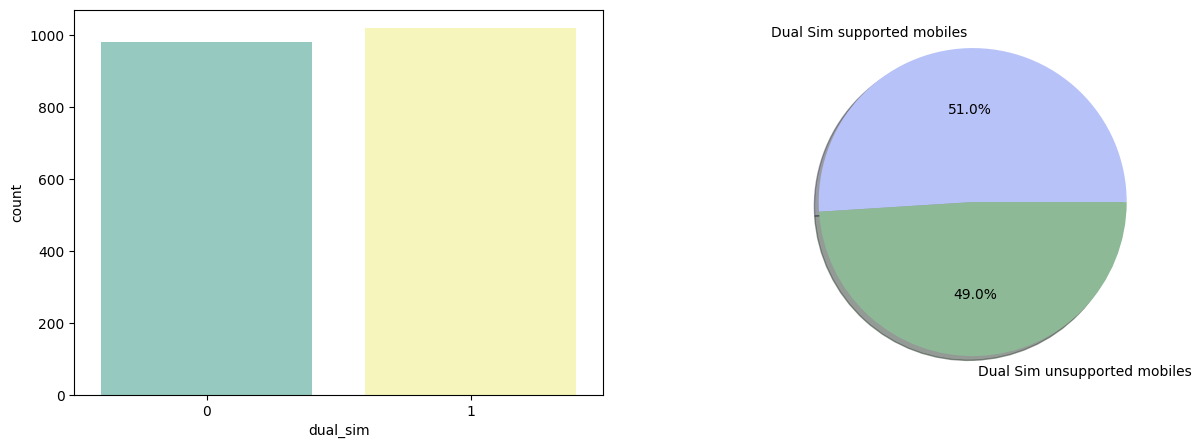

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = "dual_sim", data = Mobile_data, palette = "Set3")
plt.subplot(1, 2, 2)
plt.pie(Mobile_data["dual_sim"].value_counts(), labels = ["Dual Sim supported mobiles", "Dual Sim unsupported mobiles"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C2F8",  "#8DB997"])
plt.show()

In [ ]:
# Create variables - DS - Dual Sim
X_DS = Mobile_data.drop(["dual_sim"], axis=1)
y_DS = Mobile_data["dual_sim"].values

In [ ]:
# Split dataset into training and testing data
X_train_DS, X_test_DS, y_train_DS, y_test_DS = train_test_split(X_DS, y_DS, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable
print("X_train: ",len(X_train_DS))
print("X_test: ",len(X_test_DS))
print("y_train: ",len(y_train_DS))
print("y_test: ",len(y_test_DS))

X_train:  1400
X_test:  600
y_train:  1400
y_test:  600


In [ ]:
# Creating the object of the class LogisticRegression
Log_Reg= LogisticRegression(solver='lbfgs',max_iter=10000)

# Training the model using the training data
Log_Reg.fit(X_train_DS,y_train_DS)

# Getting the intercept and the coefficients of the model
print("Intercept:",Log_Reg.intercept_,"\nCoefficients:", Log_Reg.coef_)

Intercept: [0.21404155] 
Coefficients: [[ 1.95974940e-05  1.45687094e-01 -1.30597438e-02 -1.48319492e-02
  -4.66056921e-02 -2.36762506e-03 -2.15936145e-01 -3.22118856e-04
  -3.93592696e-02  4.31425598e-03 -1.02155746e-04  1.42616182e-04
   3.37786562e-01 -9.13617035e-03 -5.45773044e-03 -1.47094180e-02
   1.81261887e-02 -9.84062086e-02  1.93164107e-02 -2.30620385e-01]]


In [ ]:
#predicting targets based on the model built
train_predictions = Log_Reg.predict(X_train_DS)
test_predictions = Log_Reg.predict(X_test_DS)

In [ ]:
# Accuracy = no. of correct predictions / total predictions
# score() method is used to find the accuracy of a model

train_accuracy = Log_Reg.score(X_train_DS,y_train_DS)
print("Train accuracy = ", train_accuracy)

test_accuracy = Log_Reg.score(X_test_DS,y_test_DS)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.5442857142857143
Test accuracy =  0.5433333333333333


Getting the threshold values that maximizes Recall, F1 score and precision

In [ ]:
#obtaining predicted probabilities
y_pred_prob = Log_Reg.predict_proba(X_test_DS)[:,1]

# Computing precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_DS, y_pred_prob)

# Finding the threshold that maximizes recall
max_recall_threshold = thresholds[np.argmax(recall)]

# Calculating F1 score for each threshold
f1_scores = 2 * (precision*recall)/(precision+recall)

#finding the threshold that maximizes F1 score
max_f1_threshold = thresholds[np.argmax(f1_scores)]

#finding the threshold that maximizes precision
max_precision_threshold = thresholds[np.argmax(precision)]

In [ ]:
print("Threshold value that maximizes the Precision:", max_precision_threshold)
print("Threshold value that maximizes the Recall:", max_recall_threshold)
print("Threshold value that maximizes the F1 score:", max_f1_threshold)

Threshold value that maximizes the Precision: 0.8784214068588907
Threshold value that maximizes the Recall: 0.31198963640687505
Threshold value that maximizes the F1 score: 0.31198963640687505


#Classification of mobiles with respect to Price range

Now, I going to predict the price of mobile with all other features.

In [ ]:
Mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,0.668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2.032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3.057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,0.869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3.919,19,4,2,1,1,1,3


([<matplotlib.patches.Wedge at 0x7f05f07d0760>,
 [Text(0.7778174593052024, 0.7778174593052023, 'low cost'),
  Text(-0.7778174593052023, 0.7778174593052024, 'medium cost'),
  Text(-0.7778174593052025, -0.7778174593052023, 'high cost'),
  Text(0.7778174593052022, -0.7778174593052025, 'very high cost')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

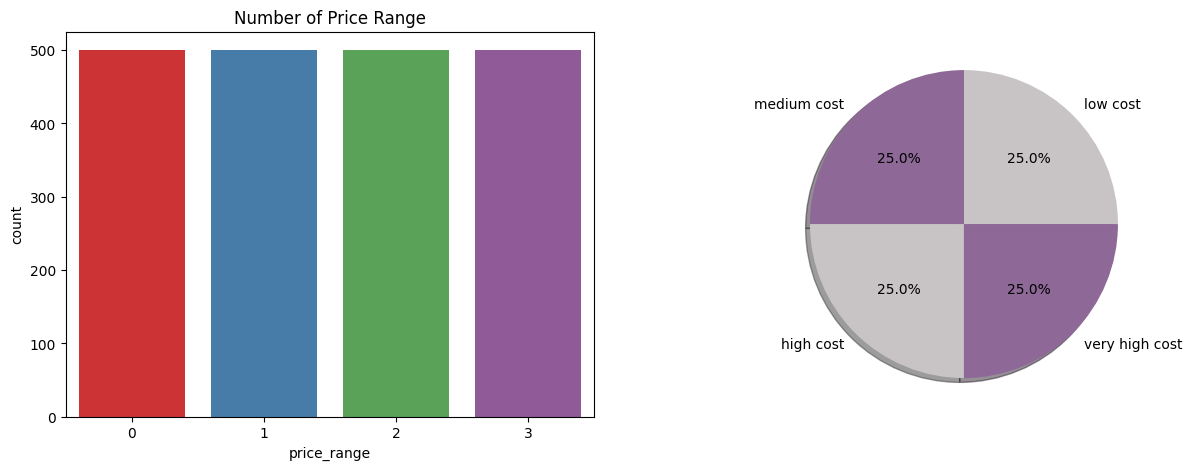

In [ ]:
# Visualize number of price range values in dataset
plt.figure(figsize=(15,5))

# Create bar plot showing count of price range value
plt.subplot(1, 2, 1)
sns.countplot(x = "price_range", data = Mobile_data, palette = "Set1")
plt.title("Number of Price Range")

# Create pie chart showing proportion of price range value
plt.subplot(1, 2, 2)
plt.pie(Mobile_data["price_range"].value_counts(), labels = ["low cost", "medium cost","high cost","very high cost"], shadow = True, autopct = "%1.1f%%", colors = ["#C8C3C4",  "#8E6897"])


Mobile phones are evenly divided into 4 price range classes with equal frequency. Therefore, the dataset is completely balanced.



In [ ]:
# Create variables
X = Mobile_data.drop(["price_range"], axis=1)
y = Mobile_data["price_range"].values

In [ ]:
# Create a SelectKBest object with f_classif as the scoring function and k=25 as the number of top features to select
selector = SelectKBest(score_func=f_classif, k =20)

# Reshape your feature matrix (if necessary)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the names of the selected features
print(X.columns[selected_features])

# Create a new DataFrame with only the selected features
X_new_df = pd.DataFrame(X_new, columns=X.columns[selected_features])

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [ ]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  1400
X_test:  600
y_train:  1400
y_test:  600


###Random Forest Classifier

In [ ]:
Random_class = RandomForestClassifier(max_depth=2, random_state=0)
Random_class.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#predicting targets based on the model built
train_predictions_RC = Random_class.predict(X_train)
test_predictions_RC = Random_class.predict(X_test)

In [ ]:
# Generating the report and printing the same
print(classification_report(y_test,test_predictions_RC))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       146
           1       0.64      0.36      0.46       168
           2       0.65      0.50      0.57       143
           3       0.77      0.92      0.83       143

    accuracy                           0.68       600
   macro avg       0.67      0.69      0.66       600
weighted avg       0.67      0.68      0.65       600



Now, Trying improve the Accuracy using cross validation



In [ ]:
rf_parm = dict(n_estimators = [20, 30, 50, 70, 100, 150], max_features = [0.1, 0.2, 0.6, 0.9], max_depth = [10,20,30],min_samples_leaf=[1,10,100, 400, 500, 600],random_state=[0])

rc = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rc, param_grid = rf_parm)

rf_grid.fit(X_train,y_train)

print("RF Best Score:", rf_grid.best_score_)
print("RF Best Parameters:", rf_grid.best_params_)

RF Best Score: 0.9028571428571428
RF Best Parameters: {'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 0}


In [ ]:
RC_best = RandomForestClassifier(n_estimators = 150,  max_features = 0.6, min_samples_leaf = 1, max_depth = 20, random_state = 0 )

RC_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_features=0.6, n_estimators=150,
                       random_state=0)

In [ ]:
#predicting targets based on the model built
train_predictions_RC_best = RC_best.predict(X_train)
test_predictions_RC_best = RC_best.predict(X_test)

In [ ]:
RC_best.score(X_test,y_test)

0.8933333333333333

In [ ]:
# Generating the report and printing the same
print(classification_report(y_test,test_predictions_RC_best))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.88      0.88      0.88       168
           2       0.85      0.82      0.84       143
           3       0.91      0.94      0.92       143

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



After Cross validation, The accuracy of Random Forest is 89%. Accuracy is increased by 20% by hyperparameter tuning.

###Building Multiple models and checking which is better along with hyperparameter tuning.

In [ ]:
# Set the random seed
random_state = 128

# Define the machine learning models
model = [LogisticRegression(random_state = random_state),
         DecisionTreeClassifier(random_state = random_state),
         SVC(random_state = random_state, probability=True),
         KNeighborsClassifier(),
         GaussianNB()]

# Define the list of class names
model_names = ["LogisticRegression",
               "DecisionTreeClassifier",
               "SVM",
               "KNeighborsClassifier",
               "NaiveBayes"]

# Define the hyperparameter grids for each model
lr_params = {"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.5, 2],
             "penalty": ["l1", "l2", "elasticnet"],
             "solver": ["liblinear"]}

dt_params = {"min_samples_split" : range(1,20,1),
             "max_depth": range(1,20,1)}

svm_params = {"kernel" : ["rbf"],
              "gamma": [0.001, 0.01, 0.1],
              "C": [1,10,50,100,200]}

knn_params = {"n_neighbors": [30,35,40,45,50,60,70,80],
              "weights": ["uniform","distance"],
              "metric":["euclidean","manhattan"]}

nb_params = {"var_smoothing": np.logspace(0,-9, num=100)}

# Define a list of hyperparameter grids
param_grids = [lr_params,
               dt_params,
               svm_params,
               knn_params,
               nb_params]

In [ ]:
# Define two list to store the results and estimators
cv_result = []
best_estimators = []

# Iterate over the models and their hyperparameter grids
for i in range(len(model)):

    # Define the stratified K-fold cross-validation scheme
    cv = StratifiedKFold(n_splits = 10)

    # Define the grid search strategy
    clf = GridSearchCV(model[i],
                       param_grid=param_grids[i],
                       cv = cv,
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)

    # Print the cross validation score, best parameters and the train and test accuracy of the model
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

    print("Machine Learning Models:", model_names[i])
    print("Cross Validation Scores:", cv_result[i])
    print("Best Parameters:", best_estimators[i])
    print("\n-----------------------------------------------------\n")

    print("Train Accuracy of Classifier: ", accuracy_score(clf.predict(X_train),y_train))
    print("Test Accuracy of Classifier: ", accuracy_score(clf.predict(X_test),y_test))
    print("\n-----------------------------------------------------\n")

    # Print the classification report
    print("Classification Report: \n", classification_report(y_test, clf.predict(X_test)))
    print("\n-----------------------------------------------------\n")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Machine Learning Models: LogisticRegression
Cross Validation Scores: 0.8507142857142856
Best Parameters: LogisticRegression(C=2, penalty='l1', random_state=128, solver='liblinear')

-----------------------------------------------------

Train Accuracy of Classifier:  0.8721428571428571
Test Accuracy of Classifier:  0.8316666666666667

-----------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       146
           1       0.78      0.64      0.70       168
           2       0.66      0.73      0.70       143
           3       0.93      1.00      0.97       143

    accuracy                           0.83       600
   macro avg       0.83      0.84      0.83       600
weighted avg       0.83      0.83      0.83       600


-----------------------------------------------------

Fitting 10 folds for each of 

Model 1 Logistic Regression     : 0.852857 (0.058745)
Model 2 Support Vector Machine  : 0.246429 (0.034663)
Model 3 Random Forest Classifier : 0.900714 (0.040526)
Model 4 Decision Tree Classifier: 0.839286 (0.037491)
Model 5 Naives Bayes Classifier : 0.812857 (0.055678)
Model 6 KNN classifier      : 0.324286 (0.054604)


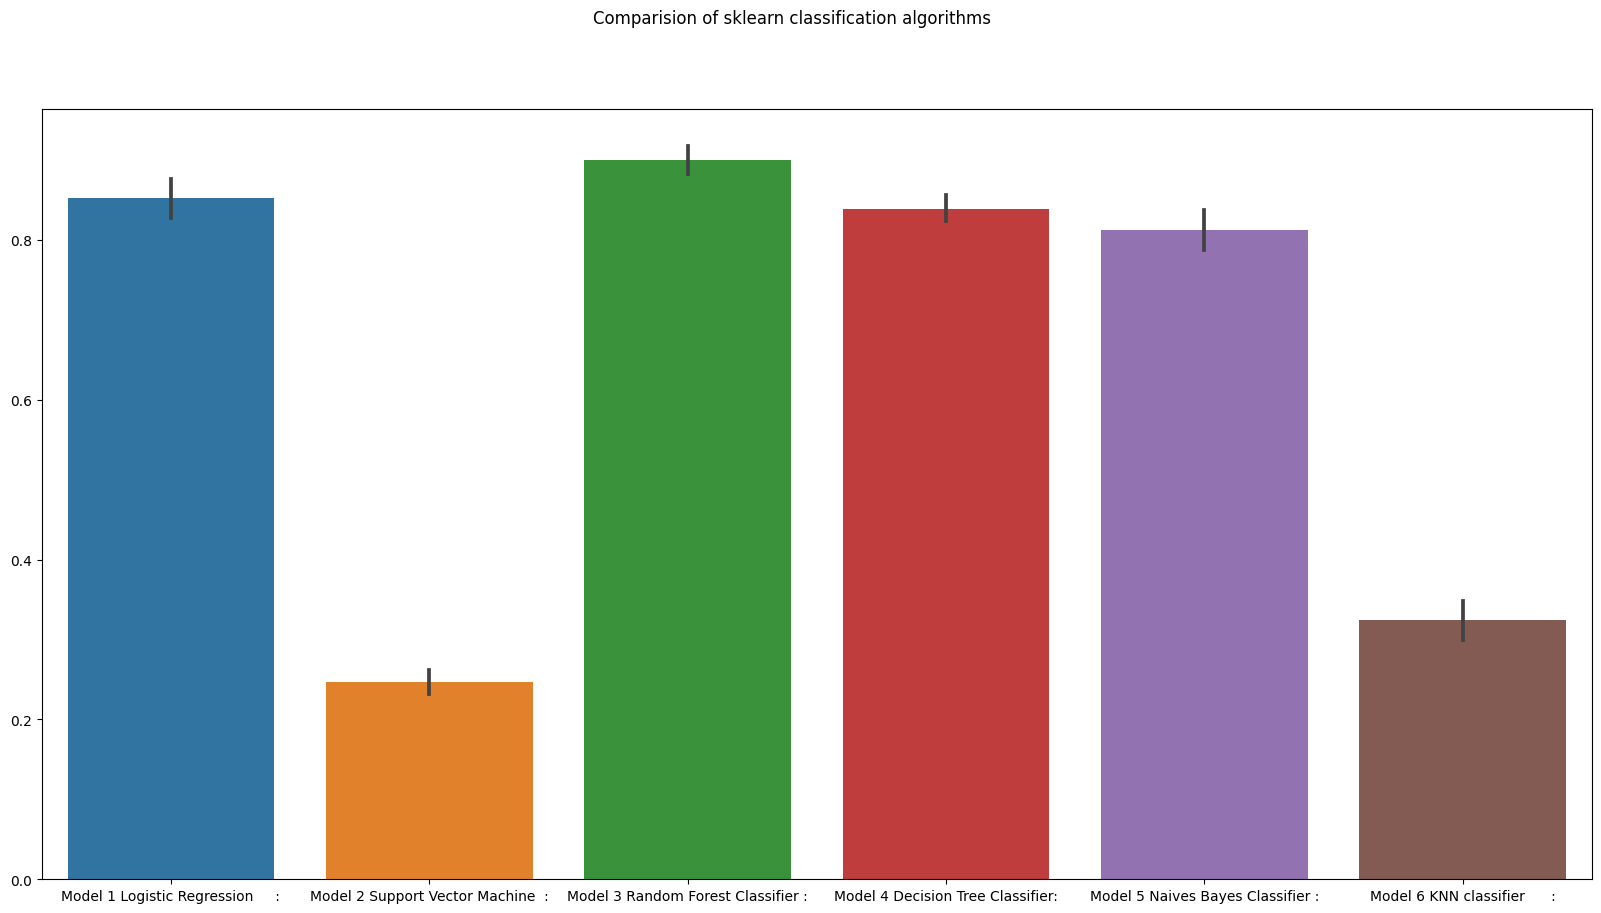

In [ ]:
#K-Folds cross-validator

#Provides train/test indices to split data in train/test sets.Split dataset into k consecutive folds (without shuffling by default).
kfold = model_selection.KFold(n_splits=20)

# preparing models
models = []
models.append(('Model 1 Logistic Regression     :', LogisticRegression(C=2, penalty='l1', random_state=128, solver='liblinear')))
models.append(('Model 2 Support Vector Machine  :',SVC(C=10, gamma=0.001, probability=True, random_state=128)))
models.append(('Model 3 Random Forest Classifier :',RandomForestClassifier(max_depth=20, max_features=0.6, n_estimators=150, random_state=0)))
models.append(('Model 4 Decision Tree Classifier:',DecisionTreeClassifier(max_depth=11, min_samples_split=11, random_state=128)))
models.append(('Model 5 Naives Bayes Classifier :',GaussianNB(var_smoothing=8.111308307896872e-07)))
models.append(('Model 6 KNN classifier      :',KNeighborsClassifier(metric='manhattan', n_neighbors=80)))

# evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# barplot algorithm comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparision of sklearn classification algorithms')
ax = fig.add_subplot(111)
sns.barplot(data=results)
ax.set_xticklabels(names)
plt.show()

1. **By comparing all the models, Random Forest Classifier gives almost 90%

1.   List item
2.   List item

accuracy both in train and test. we can see that the values of precision(nearly 0.9), recall(nearly 0.9) and f1 score(nearly 0.9) for Random Forest Classifier are much better than the remaining models.**


2. **So, we can conclude that Random Forest Classifier will give us the best predictions.**